# BibRec

### RF Features: Country, State, Age, Year-of-Publication

In [48]:
from bibrec.server.Utils import get_books, get_users, get_ratings

books = get_books("data/BX-Books.csv")
users = get_users("data/BX-Users.csv")
ratings = get_ratings("data/BX-Book-Ratings.csv")

/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(path, sep=";", encoding="latin-1")


With NaN values 34.862889904962536
used mean values 34.89089921397002


/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:38: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [50]:
explicit_ratings = ratings[ratings.book_rating != 0]
explicit_ratings

,user_id,isbn,book_rating,isbn13
1,276726,0155061224,5,9780155061224
3,276729,052165615X,3,9780521656153
4,276729,0521795028,6,9780521795029
6,276736,3257224281,8,9783257224283
7,276737,0600570967,6,9780600570967
...,...,...,...,...
1149771,276704,0743211383,7,9780743211383
1149773,276704,0806917695,5,9780806917696
1149775,276704,1563526298,9,9781563526299
1149777,276709,0515107662,10,9780515107661


In [51]:
df_ratings = explicit_ratings.groupby('isbn13').user_id.count().sort_values(ascending=False)
df_ratings = df_ratings[:1000]
df_ratings = df_ratings.reset_index()
# user_id => nr of ratings
df_ratings = df_ratings.drop('user_id',axis=1)
df_ratings

,isbn13
0,9780316666343
1,9780971880108
2,9780385504201
3,9780312195519
4,9780679781585
...,...
995,978038000148
996,9780671695071
997,9780684853529
998,9780394223803


In [52]:
df_ratings = df_ratings.merge(explicit_ratings, on='isbn13', how='left')
df_ratings

,isbn13,user_id,isbn,book_rating
0,9780316666343,277439,0316666343,7
1,9780316666343,277752,0316666343,7
2,9780316666343,278633,0316666343,9
3,9780316666343,638,0316666343,10
4,9780316666343,709,0316666343,3
...,...,...,...,...
68510,9780446679367,223787,0446679364,7
68511,9780446679367,226267,0446679364,8
68512,9780446679367,242574,0446679364,8
68513,9780446679367,260099,0446679364,4


In [53]:
# merge book dataset
df = df_ratings.merge(books[['isbn13', 'year_of_publication']])
df

,isbn13,user_id,isbn,book_rating,year_of_publication
0,9780316666343,277439,0316666343,7,2002.0
1,9780316666343,277752,0316666343,7,2002.0
2,9780316666343,278633,0316666343,9,2002.0
3,9780316666343,638,0316666343,10,2002.0
4,9780316666343,709,0316666343,3,2002.0
...,...,...,...,...,...
71362,9780446679367,223787,0446679364,7,2002.0
71363,9780446679367,226267,0446679364,8,2002.0
71364,9780446679367,242574,0446679364,8,2002.0
71365,9780446679367,260099,0446679364,4,2002.0


In [54]:
# merge user dataset
df = df_ratings.merge(users[['user_id', 'country', 'state', 'age']])
df

,isbn13,user_id,isbn,book_rating,country,state,age
0,9780316666343,277439,0316666343,7,usa,oregon,65.000000
1,9780671027360,277439,0671027360,7,usa,oregon,65.000000
2,9780316666343,277752,0316666343,7,usa,louisiana,18.000000
3,9780679734772,277752,0679734775,8,usa,louisiana,18.000000
4,9780316666343,278633,0316666343,9,usa,utah,31.368630
...,...,...,...,...,...,...,...
68510,9780394223803,271077,0394223802,10,canada,british columbia,49.000000
68511,9780446679367,15783,0446679364,6,usa,montana,32.575905
68512,9780446679367,129135,0446679364,8,NaN,oregon,26.199418
68513,9780446679367,204414,0446679364,9,usa,illinois,42.000000


In [55]:
country = pd.get_dummies(df['country'],drop_first=True)
country

,"\n/a\"", greece""",albania,algeria,antarctica,argentina,aroostook,aruba,australia,austria,bahamas,...,ysa,yugoslavia,zambia,zimbabwe,", denmark",", england, united kingdom",", malaysia",", mexico",", new zealand",", portugal"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
state = pd.get_dummies(df['state'],drop_first=True)
state

,&#322;ódzkie,(alacant),*,-,.,...,"\n/a\""",\n/a`,_,a coruña,...,zuid-holland,zuidholland,zurich,zürich,álava,maryland,new york,or,tn,town of bali
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df = pd.concat([df, country, state], axis = 1)
df

,isbn13,user_id,isbn,book_rating,country,state,age,"\n/a\"", greece""",albania,algeria,...,zuid-holland,zuidholland,zurich,zürich,álava,maryland,new york,or,tn,town of bali
0,9780316666343,277439,0316666343,7,usa,oregon,65.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780671027360,277439,0671027360,7,usa,oregon,65.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9780316666343,277752,0316666343,7,usa,louisiana,18.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9780679734772,277752,0679734775,8,usa,louisiana,18.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,278633,0316666343,9,usa,utah,31.368630,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68510,9780394223803,271077,0394223802,10,canada,british columbia,49.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68511,9780446679367,15783,0446679364,6,usa,montana,32.575905,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68512,9780446679367,129135,0446679364,8,NaN,oregon,26.199418,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68513,9780446679367,204414,0446679364,9,usa,illinois,42.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df = df.loc[:,~df.columns.duplicated()]
df

,isbn13,user_id,isbn,book_rating,country,state,age,"\n/a\"", greece""",albania,algeria,...,zuid-holland,zuidholland,zurich,zürich,álava,maryland,new york,or,tn,town of bali
0,9780316666343,277439,0316666343,7,usa,oregon,65.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780671027360,277439,0671027360,7,usa,oregon,65.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9780316666343,277752,0316666343,7,usa,louisiana,18.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9780679734772,277752,0679734775,8,usa,louisiana,18.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,278633,0316666343,9,usa,utah,31.368630,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68510,9780394223803,271077,0394223802,10,canada,british columbia,49.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68511,9780446679367,15783,0446679364,6,usa,montana,32.575905,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68512,9780446679367,129135,0446679364,8,NaN,oregon,26.199418,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68513,9780446679367,204414,0446679364,9,usa,illinois,42.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df = df.drop(['isbn', 'isbn13', 'user_id', 'country', 'state'], axis = 1)
df

,book_rating,age,"\n/a\"", greece""",albania,algeria,antarctica,argentina,aroostook,aruba,australia,...,zuid-holland,zuidholland,zurich,zürich,álava,maryland,new york,or,tn,town of bali
0,7,65.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,65.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,18.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,18.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,31.368630,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68510,10,49.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68511,6,32.575905,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68512,8,26.199418,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68513,9,42.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X = df.drop('book_rating', axis = 1) #Features
X

,age,"\n/a\"", greece""",albania,algeria,antarctica,argentina,aroostook,aruba,australia,austria,...,zuid-holland,zuidholland,zurich,zürich,álava,maryland,new york,or,tn,town of bali
0,65.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31.368630,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68510,49.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68511,32.575905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68512,26.199418,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68513,42.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
Y = df['book_rating']   # Target Variables
Y

0         7
1         7
2         7
3         8
4         9
         ..
68510    10
68511     6
68512     8
68513     9
68514     8
Name: book_rating, Length: 68515, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [63]:
rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1)

In [64]:
rfc.fit(X_train, y_train)

RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1,
                       warm_start=True)

In [65]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(accuracy_score(y_test,rfc_pred)*100)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00       118
           3       0.04      0.01      0.02       267
           4       0.02      0.01      0.01       384
           5       0.27      0.17      0.21      1767
           6       0.11      0.05      0.07      1523
           7       0.20      0.16      0.18      3345
           8       0.29      0.42      0.35      5230
           9       0.24      0.22      0.23      3829
          10       0.33      0.38      0.35      4001

    accuracy                           0.27     20555
   macro avg       0.15      0.14      0.14     20555
weighted avg       0.25      0.27      0.25     20555

26.89856482607638


Confusion matrix, without normalization
[[   0    2    1    2    2    5    9   31   17   22]
 [   0    0    1    2    3    8   15   51   20   18]
 [   0    2    4    2   24   15   35   81   42   62]
 [   6    3    3    2   17   15   68  130   64   76]
 [   4    3   11   15  303   75  220  596  232  308]
 [   0    3    9   13  106   76  270  563  231  252]
 [   3   10   18   25  166  136  548 1254  548  637]
 [   6    4   22   28  227  158  707 2201  903  974]
 [   6    6   14   26  152  105  455 1382  859  824]
 [   5    4    8   18  136   85  354 1206  649 1536]]
Normalized confusion matrix
[[0.   0.02 0.01 0.02 0.02 0.05 0.1  0.34 0.19 0.24]
 [0.   0.   0.01 0.02 0.03 0.07 0.13 0.43 0.17 0.15]
 [0.   0.01 0.01 0.01 0.09 0.06 0.13 0.3  0.16 0.23]
 [0.02 0.01 0.01 0.01 0.04 0.04 0.18 0.34 0.17 0.2 ]
 [0.   0.   0.01 0.01 0.17 0.04 0.12 0.34 0.13 0.17]
 [0.   0.   0.01 0.01 0.07 0.05 0.18 0.37 0.15 0.17]
 [0.   0.   0.01 0.01 0.05 0.04 0.16 0.37 0.16 0.19]
 [0.   0.   0.   0.01 0.04 0.0

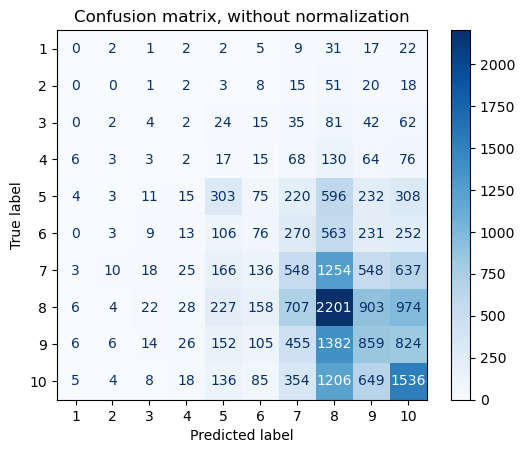

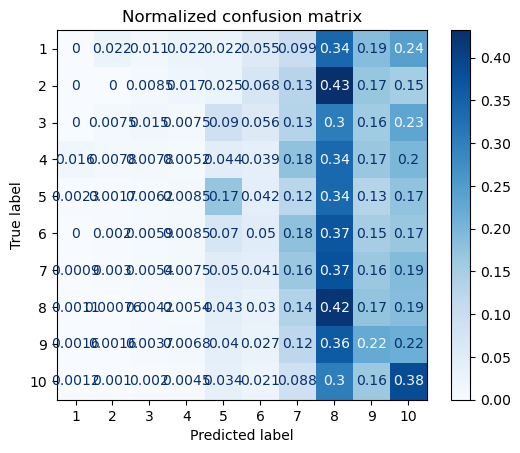

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()